In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [3]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#查看各列信息，主要看是否有缺失值
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#测试集数据查看
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
#数值型数据分析
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
# 相关性协方差表,corr()函数,返回结果接近0说明无相关性,大于0说明是正相关,小于0是负相关.
train_corr = train_df.drop('PassengerId',axis=1).corr()
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


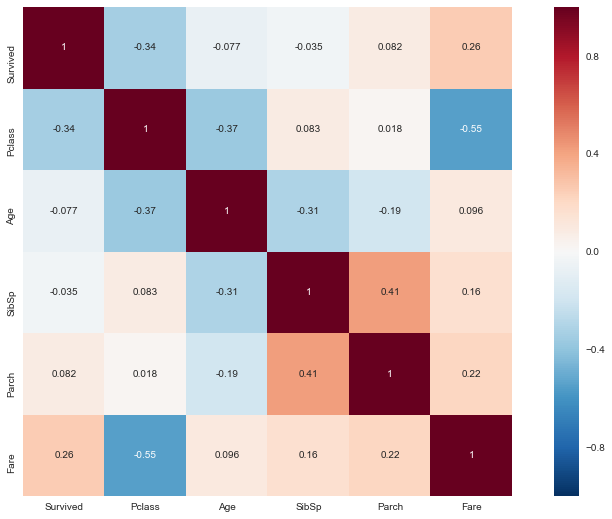

In [10]:
#画热力相关图
a = plt.subplots(figsize=(15,9))
a = sns.heatmap(train_corr,vmin=-1,vmax=1,annot=True,square=True)

In [13]:
#分析乘客等级和生存下来的关系
train_df.groupby(['Pclass'])['Pclass','Survived'].mean()

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


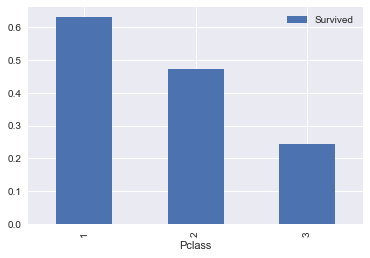

In [26]:
#分析乘客等级和生存下来的关系
train_df[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

In [27]:
#单独分析性别与生存下来的关系
train_df.groupby(['Sex'])['Sex','Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


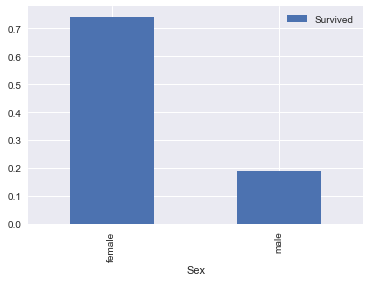

In [29]:
#单独分析性别与生存下来的关系
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

In [32]:
#分析兄弟配偶数量和生存下来的关系
train_df.groupby(['SibSp'])[['SibSp','Survived']].mean()

,SibSp,Survived
SibSp,,
0,0.0,0.345395
1,1.0,0.535885
2,2.0,0.464286
3,3.0,0.250000
4,4.0,0.166667
5,5.0,0.000000
8,8.0,0.000000


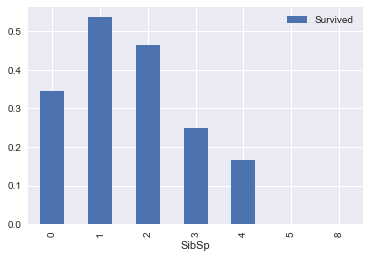

In [33]:
#分析兄弟配偶数量和生存下来的关系
train_df[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar()

In [35]:
#分析父母子女数量和生存下来的关系
train_df.groupby('Parch')[['Parch','Survived']].mean()

,Parch,Survived
Parch,,
0,0.0,0.343658
1,1.0,0.550847
2,2.0,0.500000
3,3.0,0.600000
4,4.0,0.000000
5,5.0,0.200000
6,6.0,0.000000


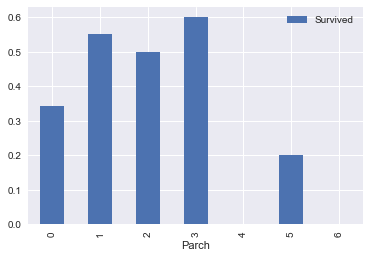

In [38]:
#分析父母子女数量和生存下来的关系
train_df[['Parch','Survived']].groupby(['Parch']).mean().plot.bar()

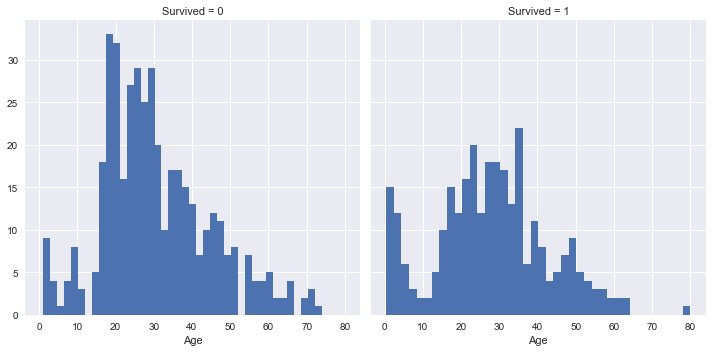

In [40]:
#分析年龄和生存下来的关系，年龄有缺失值
g = sns.FacetGrid(train_df,col='Survived',size=5)
g.map(plt.hist,'Age',bins=40)

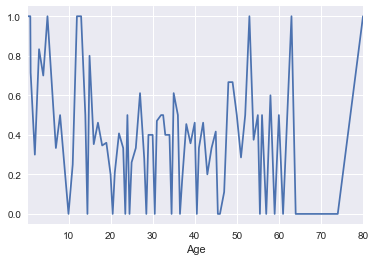

In [41]:
train_df.groupby(['Age'])['Survived'].mean().plot()

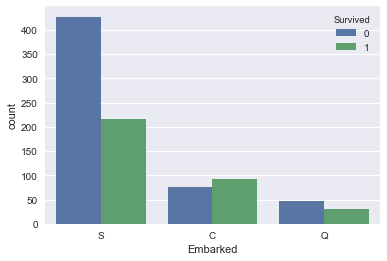

In [43]:
sns.countplot('Embarked',hue='Survived',data=train_df)